# What drives the price of a car?

![](images/kurt.png)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Unliked the fixed retail price of a new car, the price of a used car could be driven by multiple additional features, such as its overall condition, current driven odometer, title status, etc. As a dealer can act as both Seller and Buyer at the same time, it is crucial to have a used car price prediction model that could assist to identify what are the key factors that play an important role, when comes to deciding the price of a user car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Our dataset contains more than 426K cars information. Because the goal is to understand what are the key factor that influence the price of a car, we should really focus on features that are actually coming from the car itself, such as its made of year, its condition, and its odometer, etc. 

On the other hand, geographical information, such as region and state, which will be considered as "outlier" because if the price is depended on local government's unique policy, then it would be out of slope of this analysis. In addition, because different model of cars will have a different prices which are associated to its unique configuration, comparing the car price based on its model does not seem to be fair, due to lack of information about the detail of the car model configuration in our current dataset; however, in order to cover customers' personal preference, this analysis will keep manufacturer as one of the factor, which make it relatively reasonable especially after removing the model factor.

Here is the list of factors/features that are involed in this analysis:

1. price: Price of the car. Will be used as Prediction target value
2. id: An unique number to a car from dealership 
3. year: Year of built or Year of model release of the car 
4. manufacturer: manufacturer of the car 
5. model: model of the car (e.g., Toyota, BMW, etc)
6. condition: condition of the car (e.g., excellent, good, like new, etc.) 
7. cylinders: number of cylinders of the car (e.g., 4 cylinders, 6 cylinders, etc.)
8. fuel: fuel type of the car (e.g., gas, diesel, etc.) 
9. odometer: number of miles the car has been driven 
10. title_status: title status of the car (e.g., clean, missing, etc.) 
11. transmission: transmission type of the car (e.g., automatic, manual, etc.) 
12. VIN: Vehicle Identification Number of the car (A unique number to a car)
13. drive: drive type of the car (e.g., fwd, rwd, etc.) 
14. size: size of the car (e.g., compact, mid-size, etc.) 
15. type: type of the car (e.g., SUV, sedan, etc.) 
16. paint_color: color of the car (e.g., Silver, Red, etc.)
17. state: state where the car is listing to sale

### Exploratory Data Analysis (EDA)

In [1]:
# Import basic libraries for EDA (DataFrame) and Visualization (plots)

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Read data from file .csv
df = pd.read_csv('data/vehicles.csv')

In [3]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
# List any column that contains missing data (null value)
df.isnull().sum().sort_values(ascending = False)

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

### Brief Summary
A quick browsing to the dataset, it is obvisouly that it conatain many null value in mutiple features. This means data cleaning process will be required


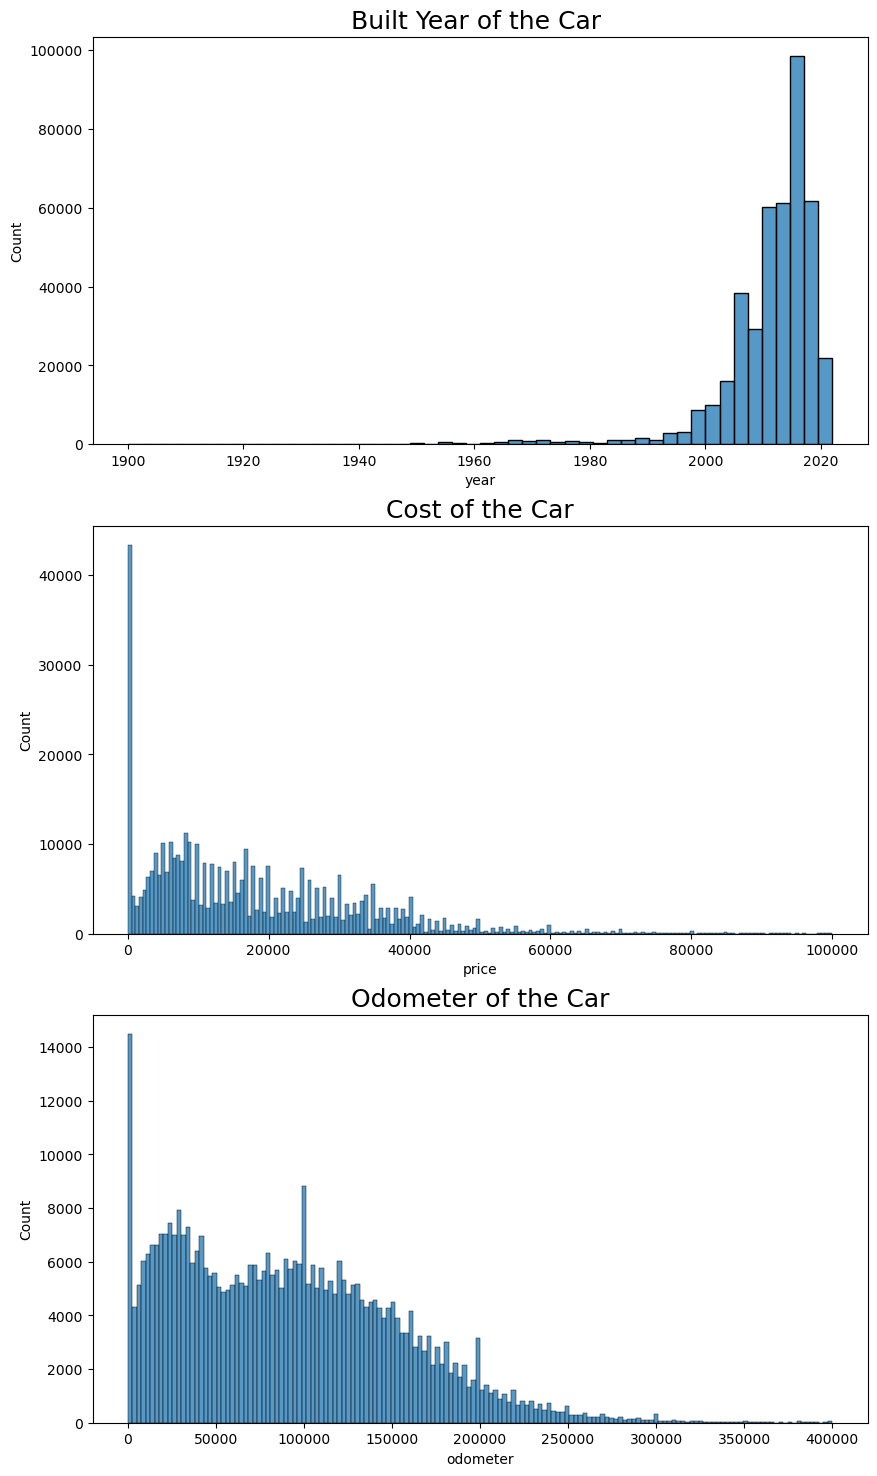

In [7]:
# Create histograms subplots for columns that contain numerical value
fig, axs = plt.subplots(3, figsize = (10, 18))

sns.histplot(df['year'], bins = 50, ax = axs[0])
sns.histplot(df['price'], binrange = (0, 100000), ax = axs[1])
sns.histplot(df['odometer'], binrange = (0, 400000), ax = axs[2])

axs[0].set_title('Built Year of the Car ', fontsize = 18)
axs[1].set_title('Cost of the Car', fontsize = 18)
axs[2].set_title('Odometer of the Car', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Histograms subplots of Year_Price_Odometer.png')

### Brief Summary
From the above histograms subplots of Year vs. Price vs. Odometer of the car, car older than 25 years seems to has less impact and customers won't purhcase them in general. The same principle apply to odometer of the car, as customers won't purhcase car that contains odometer over 400,000 miles

In addtion, some outliers will be removed from Price and Odometer features.


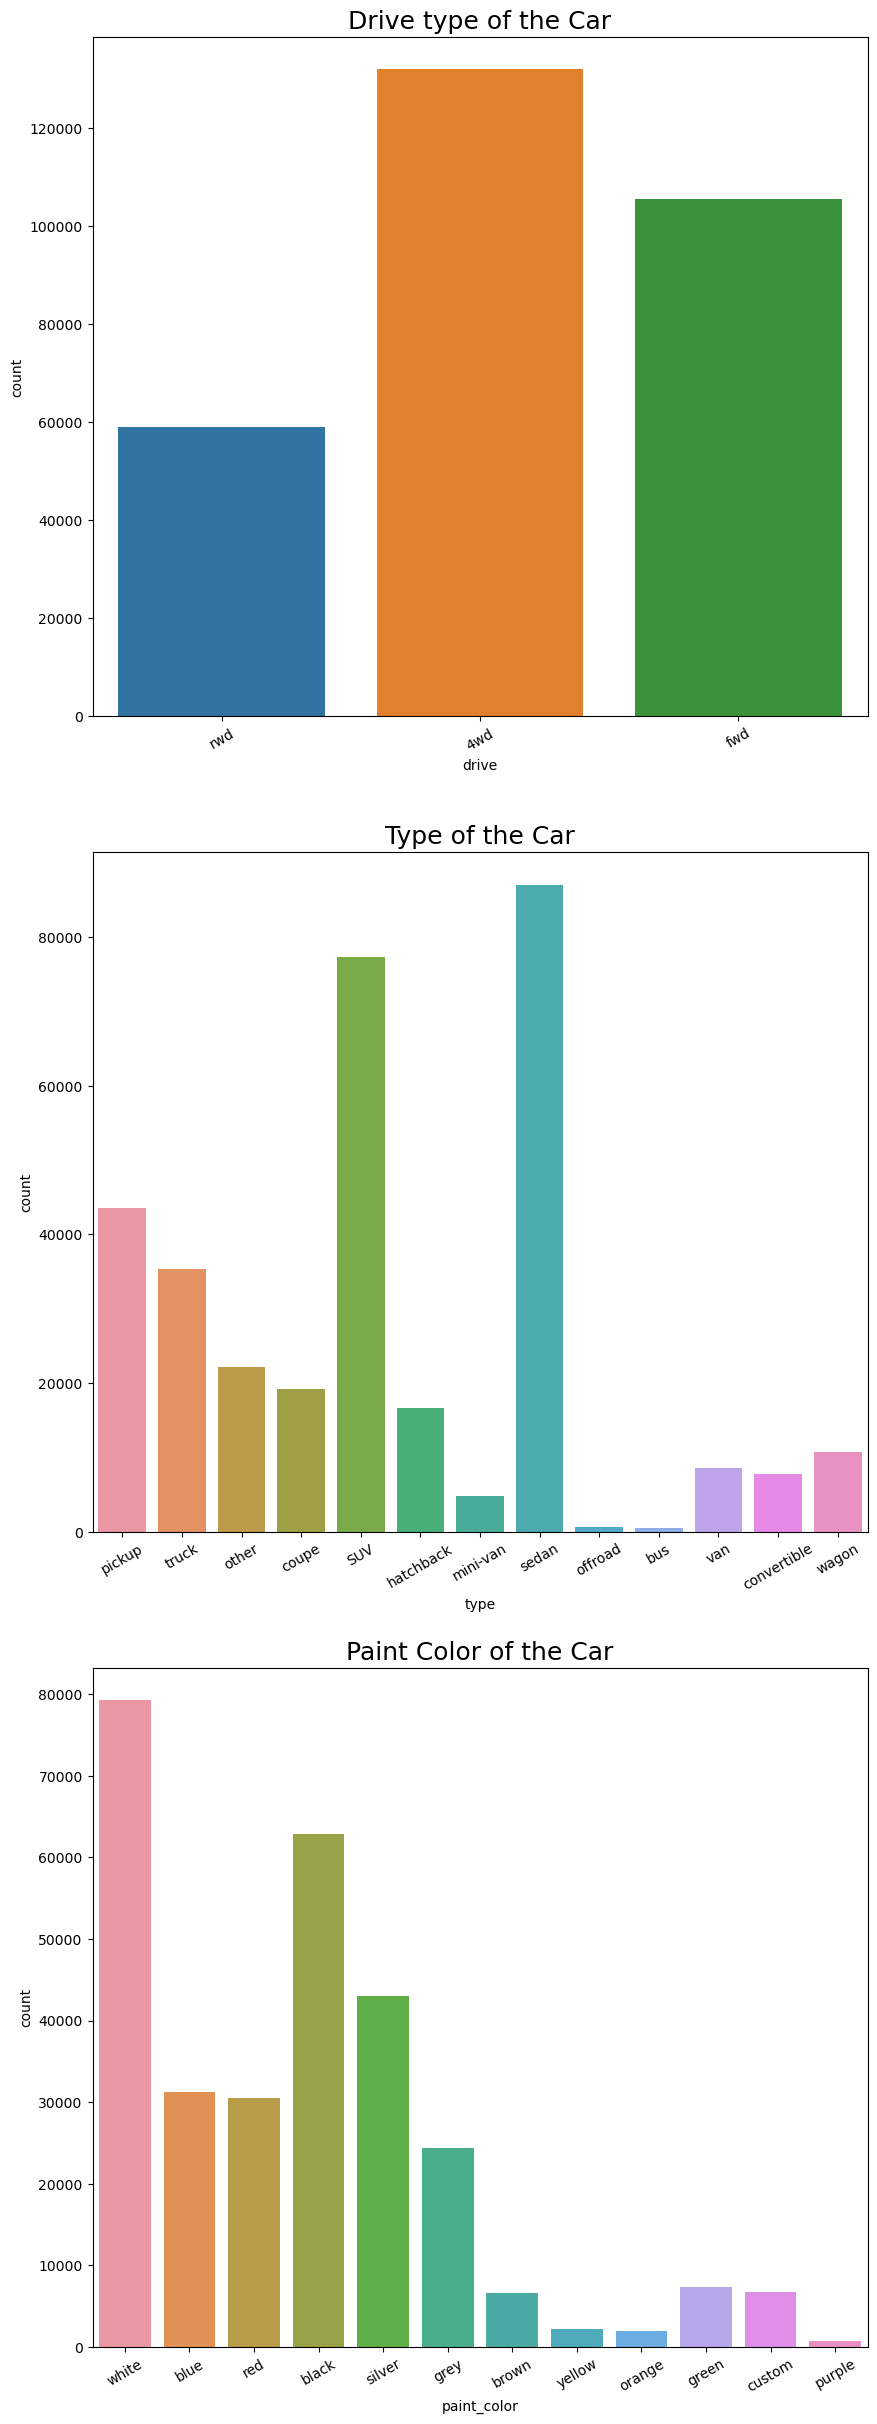

In [8]:
# Create countplot subplot for categorical columns 'drive', 'type', and 'paint_color'
fig, axs = plt.subplots(3, figsize=(10, 30))

sns.countplot(x = df['drive'], ax = axs[0])
sns.countplot(x = df['type'], ax = axs[1])
sns.countplot(x = df['paint_color'], ax = axs[2])

axs[0].set_title('Drive type of the Car', fontsize = 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 30)

axs[1].set_title('Type of the Car', fontsize = 18)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 30)

axs[2].set_title('Paint Color of the Car', fontsize = 18)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation = 30)

# Save a copy of plot image
plt.savefig('images/Countplot subplots of Drive_Type_PaintColor.png')

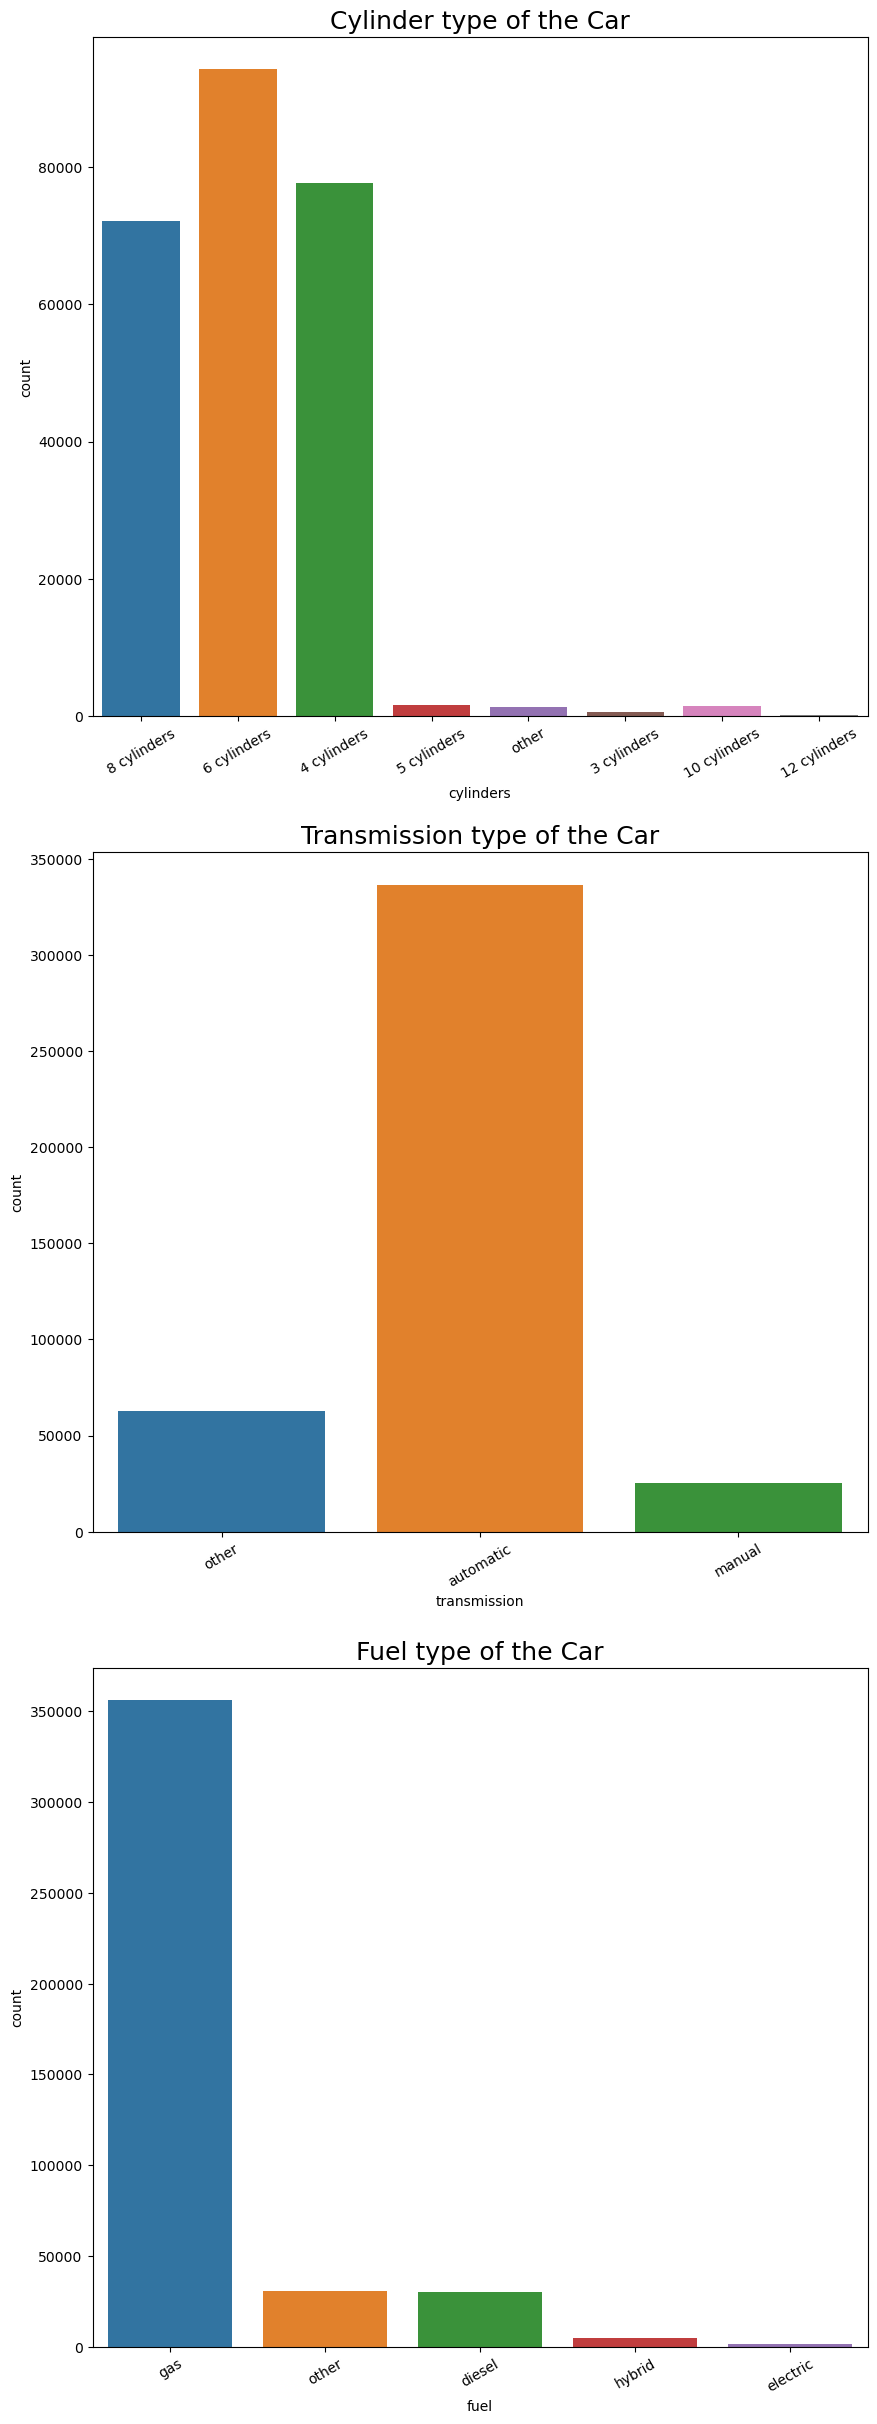

In [9]:
# Create countplot subplot for categorical columns 'cylinders', 'transmission', and 'fuel'
fig, axs = plt.subplots(3, figsize = (10, 30))

sns.countplot(x = df['cylinders'],ax = axs[0])
sns.countplot(x = df['transmission'], ax = axs[1])
sns.countplot(x = df['fuel'], ax = axs[2])

axs[0].set_title('Cylinder type of the Car', fontsize = 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 30)

axs[1].set_title('Transmission type of the Car', fontsize = 18)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 30)

axs[2].set_title('Fuel type of the Car', fontsize = 18)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation = 30)

# Save a copy of plot image
plt.savefig('images/Countplot subplots of Cylinders_Transmission_Fuel.png')

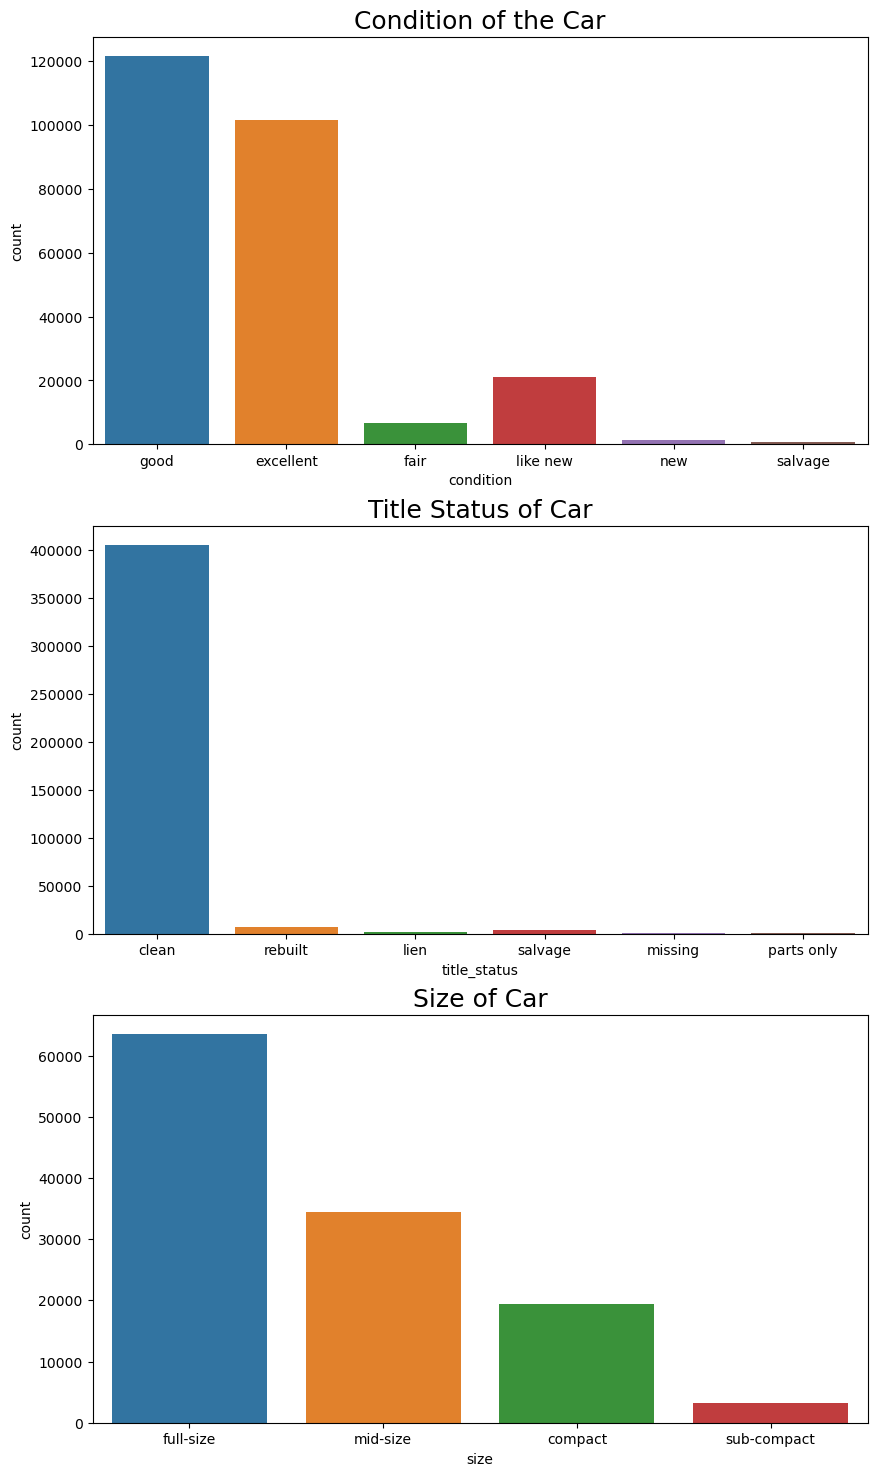

In [10]:
# Create countplot subplot for categorical columns 'condition', 'title_status', and 'size'
fig, axs = plt.subplots(3, figsize = (10, 18))

sns.countplot(x = df['condition'],ax = axs[0])
sns.countplot(x = df['title_status'], ax = axs[1])
sns.countplot(x = df['size'], ax = axs[2])

axs[0].set_title('Condition of the Car', fontsize = 18)
axs[1].set_title('Title Status of Car', fontsize = 18)
axs[2].set_title('Size of Car', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Countplot subplots of Condition_TitleStatus_Size.png')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Data Cleaning

1. Set index to id (unique value)
2. Drop any duplicate input based on VIN number (unique value)
3. Drop irrelevant (or unique value) column: region, VIN, model, state
4. Fill null value in "paint_color" as "custom" due to either the color information is missing or unable to identify
5. Fill null value in "cylinders" as "other" due to either the cylinders information is missing or unable to identify
6. Fill null value in "transmission" as "other" due to either the transmission information is missing or unable to identify
7. Fill null value in "fuel" as "other" due to either the fuel information is missing or unable to identify
8. Drop car age (year) over 25 year old as normal customers do not purchase used car over 25 years old
9. Drop car price = 0 and abnormal low prices and high prices. e.g: id = 448, 364967, 318592
10. Drop car odometer outside of 1,000 - 400,000 miles as normal customers do not purchase used car over 25 years old
11. Drop abnormal cases like "SPECIAL FINANCE PROGRAM 2020". e.g: id = 7315262722
12. Filling data for each feature that contains null value

In [11]:
# Set index to id (unique value)
df.set_index('id', inplace = True)

In [12]:
# Identify duplicate value based on the same VIN number
mylist_dupli_vin = list(dict.fromkeys(df['VIN']))
len(mylist_dupli_vin)

118247

In [13]:
# Drop duplicates based on same VIN numver
df = df.drop_duplicates('VIN', keep = 'last')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118247 entries, 7306676175 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        118247 non-null  object 
 1   price         118247 non-null  int64  
 2   year          117653 non-null  float64
 3   manufacturer  115187 non-null  object 
 4   model         117548 non-null  object 
 5   condition     61098 non-null   object 
 6   cylinders     70319 non-null   object 
 7   fuel          116625 non-null  object 
 8   odometer      116714 non-null  float64
 9   title_status  114601 non-null  object 
 10  transmission  117014 non-null  object 
 11  VIN           118246 non-null  object 
 12  drive         90851 non-null   object 
 13  size          30310 non-null   object 
 14  type          102187 non-null  object 
 15  paint_color   87491 non-null   object 
 16  state         118247 non-null  object 
dtypes: float64(2), int64(1), object(14)

In [14]:
# Drop irrelevant (or unique value) column: region, VIN, model, state
df_drop = df.drop(columns = ['region','VIN', 'model', 'state'], axis = 1)
df_drop.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
id,,,,,,,,,,,,,
7306676175,26990,2016.0,lexus,good,NaN,gas,31363.0,clean,other,fwd,NaN,hatchback,white
7316846605,4500,2008.0,ford,NaN,6 cylinders,gas,187016.0,clean,automatic,rwd,NaN,coupe,red
7316762099,4299,2007.0,nissan,NaN,4 cylinders,gas,189321.0,clean,automatic,fwd,NaN,sedan,silver
7316755272,0,2015.0,nissan,excellent,4 cylinders,gas,99505.0,clean,automatic,fwd,NaN,sedan,silver
7316694878,16988,2008.0,toyota,NaN,NaN,gas,188099.0,clean,automatic,4wd,NaN,NaN,NaN


In [15]:
# Fill null value in "paint_color" as "custom" due to either the color information is missing or unable to identify
df_drop.paint_color = df_drop.paint_color.fillna('custom')

# Fill null value in "cylinders" as "other" due to either the cylinders information is missing or unable to identify
df_drop.cylinders = df_drop.cylinders.fillna('other')

# Fill null value in "transmission" as "other" due to either the transmission information is missing or unable to identify
df_drop.transmission = df_drop.transmission.fillna('other')

# Fill null value in "fuel" as "other" due to either the fuel information is missing or unable to identify
df_drop.fuel = df_drop.fuel.fillna('other')

In [16]:
# Drop car age (year) over 25 year old as normal customers do not purchase used car over 25 years old
df_drop_year = df_drop[df_drop['year'].between(1997.0, 2022.0)]
df_drop_year.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
id,,,,,,,,,,,,,
7306676175,26990,2016.0,lexus,good,other,gas,31363.0,clean,other,fwd,NaN,hatchback,white
7316846605,4500,2008.0,ford,NaN,6 cylinders,gas,187016.0,clean,automatic,rwd,NaN,coupe,red
7316762099,4299,2007.0,nissan,NaN,4 cylinders,gas,189321.0,clean,automatic,fwd,NaN,sedan,silver
7316755272,0,2015.0,nissan,excellent,4 cylinders,gas,99505.0,clean,automatic,fwd,NaN,sedan,silver
7316694878,16988,2008.0,toyota,NaN,other,gas,188099.0,clean,automatic,4wd,NaN,NaN,custom


In [17]:
# Drop car price = 0 and abnormal low prices and high prices. e.g: id = 448, 364967, 318592
df_drop_price = df_drop_year[df_drop_year['price'].between(1000.0, 300000.0)]

In [18]:
# Drop car odometer outside of 1,000 - 400,000 miles as normal customers do not purchase used car over 25 years old
# Drop abnormal cases like "SPECIAL FINANCE PROGRAM 2020". e.g: id = 7315262722
df_drop_odometer = df_drop_price[df_drop_price['odometer'].between(1000.0, 400000.0)]

In [19]:
# Filling data for each feature that contains null value

# Sort value based on 'price' and 'odometer' for filling null value in 'condition'
df_sort_price_odo_for_condition = df_drop_odometer.sort_values(by = ['price','odometer'], ascending = [True, True], na_position = 'first')

# Fill value with forward and/or backward filling for null value in 'condition'
df_sort_price_odo_for_condition['condition'] = df_sort_price_odo_for_condition['condition'].ffill().bfill()

# Sort value based on 'price' for filling null value in 'condition'
df_sort_price_fro_manuf = df_sort_price_odo_for_condition.sort_values(by = ['price'], ascending = [True], na_position = 'first')

# Fill value with forward and/or backward filling for null value in 'manufacturer'
df_sort_price_fro_manuf['manufacturer'] = df_sort_price_fro_manuf['manufacturer'].ffill()

# Sort value based on 'price' and 'odometer' for filling null value in 'title_status'
df_sort_price_odo_for_title = df_sort_price_fro_manuf.sort_values(by = ['price', 'odometer'], ascending = [True, False], na_position = 'first')

# Fill value with forward and/or backward filling for null value in 'title_status'
df_sort_price_odo_for_title['title_status'] = df_sort_price_odo_for_title['title_status'].bfill()

# Sort value based on 'fuel' for filling null value in 'type'
df_sort_fuel_for_type = df_sort_price_odo_for_title.sort_values(by = ['fuel'], ascending = [True], na_position = 'first')

# Fill value with forward and/or backward filling for null value in 'type'
df_sort_fuel_for_type['type'] = df_sort_fuel_for_type['type'].bfill()

# Sort value based on 'type' for filling null value in 'drive'
df_sort_type_for_drive = df_sort_fuel_for_type.sort_values(by = ['type'], ascending = [True], na_position = 'first')

# Fill value with forward and/or backward filling for null value in 'drive'
df_sort_type_for_drive['drive'] = df_sort_type_for_drive['drive'].bfill()

# Sort value based on 'drive' for filling null value in 'cylinders'
df_sort_drive_for_cyli = df_sort_type_for_drive.sort_values(by = ['drive'], ascending = [False], na_position = 'first')

# Fill value with forward and/or backward filling for null value in 'cylinders'
df_sort_drive_for_cyli['cylinders'] = df_sort_drive_for_cyli['cylinders'].ffill()

# Sort value based on 'type' for filling null value in 'size'
df_sort_type_for_size = df_sort_drive_for_cyli.sort_values(by = ['type'], ascending = [True], na_position = 'first')

# Fill value with forward and/or backward filling for null value in 'size'
df_sort_type_for_size['size'] = df_sort_type_for_size['size'].ffill().bfill()


In [20]:
# Re-verify any null in the dataset.
null_values_columns_df_sort_type_for_size = df_sort_type_for_size.isnull().sum()
null_values_columns_df_sort_type_for_size.sort_values(ascending = False)

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [21]:
# Finalized clean dataset
df_cleaned = df_sort_type_for_size
df_cleaned.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
id,,,,,,,,,,,,,
7314728285,13850,2014.0,jeep,excellent,6 cylinders,gas,113194.0,clean,automatic,4wd,full-size,SUV,silver
7311491172,27950,2017.0,honda,excellent,4 cylinders,gas,28647.0,clean,automatic,4wd,full-size,SUV,custom
7313303922,27950,2018.0,ford,like new,6 cylinders,gas,36688.0,clean,automatic,4wd,full-size,SUV,grey
7310286251,23990,2018.0,honda,good,other,gas,32074.0,clean,other,4wd,full-size,SUV,custom
7311995941,28997,2007.0,ford,excellent,other,gas,94990.0,clean,automatic,4wd,full-size,SUV,blue


In [22]:
df_cleaned.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96818 entries, 7314728285 to 7311873203
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         96818 non-null  int64  
 1   year          96818 non-null  float64
 2   manufacturer  96818 non-null  object 
 3   condition     96818 non-null  object 
 4   cylinders     96818 non-null  object 
 5   fuel          96818 non-null  object 
 6   odometer      96818 non-null  float64
 7   title_status  96818 non-null  object 
 8   transmission  96818 non-null  object 
 9   drive         96818 non-null  object 
 10  size          96818 non-null  object 
 11  type          96818 non-null  object 
 12  paint_color   96818 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 10.3+ MB


In [24]:
# Save a copy for Clean dataset
df_cleaned.to_csv('data/cars_cleaned.csv', index = False)

### Overview of dataset based on current numerical features: Price, Odometer, Year

Create visualized plots to double check any potential relationships between current numerical features between Price, Odometer, and Year

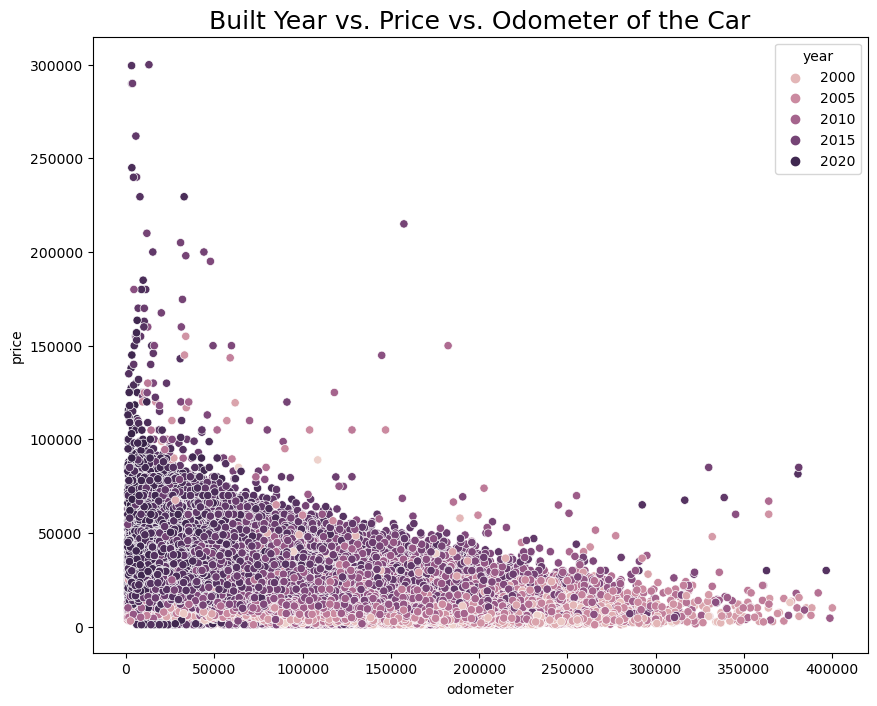

In [25]:
# Get a general idea of clean dataset based on current numerical features 
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_cleaned, x = 'odometer', y = 'price', hue = 'year')

plt.title('Built Year vs. Price vs. Odometer of the Car', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Scatterplot of Year_Price_Odometer.png')

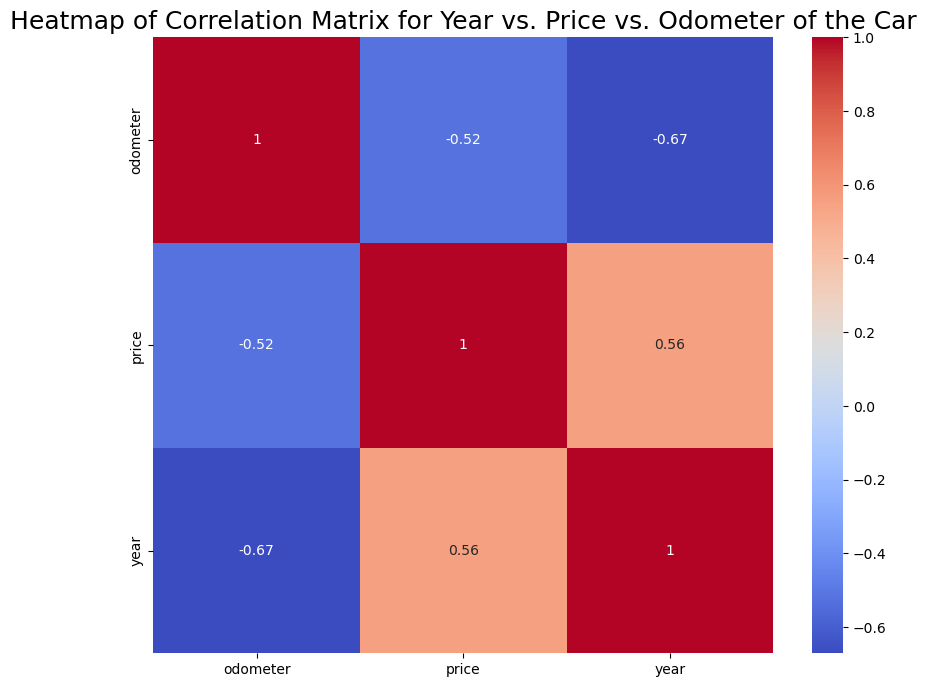

In [26]:
# Heatmap of correlation matrix based on current numerical features 
df_heatmap = df_cleaned[['odometer', 'price', 'year']]

plt.figure(figsize = (10, 8))
sns.heatmap(df_heatmap.corr(), annot = True, cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix for Year vs. Price vs. Odometer of the Car', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Heatmap_of_corr_matrix_Year_Price_Odometer.png')

### Features preprocessing
Convert Ordinal value into Scale of number value respectively 

In [27]:
# Reclasified ordinal (ordered) values in 'condition' feature
def purpose(x):
    if x == 'new':
        return '5'
    elif x == 'like new':
        return '4'
    elif x == 'excellent':
        return '3'
    elif x == 'good':
        return '2'
    elif x == 'fair':
        return '1'
    elif x == 'salvage':
        return '0'
    else:
        return x

# Replace the value in specific columns for easy reading

df_cleaned['condition'] = df_cleaned['condition'].apply(purpose).astype(str).astype(int)

In [28]:
# Reclasified ordinal (ordered) values in 'title_status' feature
def purpose(x):
    if x == 'clean':
        return '5'
    elif x == 'rebuilt':
        return '4'
    elif x == 'salvage':
        return '3'
    elif x == 'lien':
        return '2'
    elif x == 'missing':
        return '1'
    elif x == 'parts only':
        return '0'
    else:
        return x

# Replace the value in specific columns for easy reading

df_cleaned['title_status'] = df_cleaned['title_status'].apply(purpose).astype(str).astype(int)

In [29]:
# replace year with age
df_cleaned['age'] = 2022 - df_cleaned['year']
df_cleaned.drop('year', axis = 1, inplace = True)

In [30]:
df_cleaned.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
id,,,,,,,,,,,,,
7314728285,13850,jeep,3,6 cylinders,gas,113194.0,5,automatic,4wd,full-size,SUV,silver,8.0
7311491172,27950,honda,3,4 cylinders,gas,28647.0,5,automatic,4wd,full-size,SUV,custom,5.0
7313303922,27950,ford,4,6 cylinders,gas,36688.0,5,automatic,4wd,full-size,SUV,grey,4.0
7310286251,23990,honda,2,other,gas,32074.0,5,other,4wd,full-size,SUV,custom,4.0
7311995941,28997,ford,3,other,gas,94990.0,5,automatic,4wd,full-size,SUV,blue,15.0


In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96818 entries, 7314728285 to 7311873203
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         96818 non-null  int64  
 1   manufacturer  96818 non-null  object 
 2   condition     96818 non-null  int64  
 3   cylinders     96818 non-null  object 
 4   fuel          96818 non-null  object 
 5   odometer      96818 non-null  float64
 6   title_status  96818 non-null  int64  
 7   transmission  96818 non-null  object 
 8   drive         96818 non-null  object 
 9   size          96818 non-null  object 
 10  type          96818 non-null  object 
 11  paint_color   96818 non-null  object 
 12  age           96818 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 10.3+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

For this analysis, the following regression models will be deployed for comparison:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regressor

In [32]:
# Import related libraries for model build, train/test, and evaluation.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Split dataset into Train and Test. Create a baseline for all model train and test results comparison

In [33]:
# Split the dataset into train and test set, in 7:3 ratio
X = df_cleaned.drop('price', axis = 1)
y = df_cleaned.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(67772, 12) (67772,)
(29046, 12) (29046,)


In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96818 entries, 7314728285 to 7311873203
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         96818 non-null  int64  
 1   manufacturer  96818 non-null  object 
 2   condition     96818 non-null  int64  
 3   cylinders     96818 non-null  object 
 4   fuel          96818 non-null  object 
 5   odometer      96818 non-null  float64
 6   title_status  96818 non-null  int64  
 7   transmission  96818 non-null  object 
 8   drive         96818 non-null  object 
 9   size          96818 non-null  object 
 10  type          96818 non-null  object 
 11  paint_color   96818 non-null  object 
 12  age           96818 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 10.3+ MB


In [35]:
# Create a baseline for all model train and test comparison
baseline_train = np.ones(y_train.shape)*y_train.mean()
baseline_test = np.ones(y_test.shape)*y_test.mean()

print('Baseline Training MSE:', mean_squared_error(baseline_train, y_train))
print('Baseline Test MSE:', mean_squared_error(baseline_test, y_test))
print('Baseline Training R2 Score:', r2_score(baseline_train, y_train))
print('Baseline Test R2 Score:', r2_score(baseline_test, y_test))

Baseline Training MSE: 205898550.9942919
Baseline Test MSE: 201713275.06823948
Baseline Training R2 Score: 0.0
Baseline Test R2 Score: -1.524102414931391e+31


### Creating preprocessing Pipeline:

1. One-hot encoding categorical features
2. Scale numerical features
3. Added Polynomial features into model train and test
4. Added Transformed Target Regressor to assist the performance of the model (allowing to use linear regression techniques more effectively with potential non-linear data).
5. Added Grid Search to help find the best parameters and hyper parameters for certain models, in order to use the final search result to train the model.

Note: All models will run through the same process separately in order to make fairly comparison in term of performance.

In [36]:
# Define Categorical features and Numerical features
categorical_cols = ['manufacturer', 'cylinders', 'fuel','transmission', 'drive', 'size', 'type', 'paint_color']
numerical_cols = ['age', 'odometer', 'condition', 'title_status']

In [37]:
# Building pre-processor with Polynomial features
# Use MinMaxScaler, due to the data is not normally distributed within each feature

prepolyprocessor = ColumnTransformer(
    transformers = [
        ('onehotencoder', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols),
        ('MinMaxScale', MinMaxScaler(), numerical_cols),
        ('poly', PolynomialFeatures(include_bias = False), numerical_cols)])


#### For Linear Regression 

In [38]:
# Use the TransformedTargetRegressor with Linear Regression
transformed_target_regressor_lr = TransformedTargetRegressor(
    regressor = LinearRegression(),
    func = np.sqrt, inverse_func = np.square)

In [39]:
# Creating the pipeline and not restricting the features
# Building the pipeline with Preprocessor and define Regressor

# Create the pipeline
pipepoly = Pipeline([
    ('prepolyprocessor', prepolyprocessor),
    ('regressor', transformed_target_regressor_lr)])

pipepoly.named_steps

{'prepolyprocessor': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['manufacturer', 'cylinders', 'fuel',
                                   'transmission', 'drive', 'size', 'type',
                                   'paint_color']),
                                 ('MinMaxScale', MinMaxScaler(),
                                  ['age', 'odometer', 'condition',
                                   'title_status']),
                                 ('poly', PolynomialFeatures(include_bias=False),
                                  ['age', 'odometer', 'condition',
                                   'title_status'])]),
 'regressor': TransformedTargetRegressor(func=<ufunc 'sqrt'>, inverse_func=<ufunc 'square'>,
                            regressor=LinearRegression())}

In [40]:
#GridSearchCV to find the best polynomial number

param_dict = {'prepolyprocessor__poly__degree': list(range(1, 3))}

gridSearchPoly = GridSearchCV(pipepoly, param_grid = param_dict, scoring = 'neg_mean_squared_error', cv = 5)
gridSearchPoly.fit(X_train, y_train)

train_preds_lr = gridSearchPoly.predict(X_train)
test_preds_lr = gridSearchPoly.predict(X_test)

model_train_mse_lr = mean_squared_error(y_train, train_preds_lr)
model_test_mse_lr = mean_squared_error(y_test, test_preds_lr)
R2_train_lr = r2_score(y_train, train_preds_lr)
R2_test_lr = r2_score(y_test, test_preds_lr)
train_time_lr = gridSearchPoly.cv_results_.get('mean_fit_time').mean()

print('Training data MSE: ', model_train_mse_lr)
print('Test data MSE: ', model_test_mse_lr)
print('Training data R2 Score: ', R2_train_lr)
print('Test data R2 Score: ', R2_test_lr)
print('Training time (mean value)', train_time_lr)

best_model_lr = gridSearchPoly.best_estimator_
print(best_model_lr.named_steps)

model_lr = best_model_lr.named_steps['regressor']
regressor_lr = model_lr.regressor_
coef_lr = regressor_lr.coef_

pred_lr = best_model_lr.named_steps['prepolyprocessor']

pd.DataFrame({'features': pred_lr.get_feature_names_out(), 'coef': coef_lr}).sort_values('coef', ascending = False)

Training data MSE:  75495970.22360228
Test data MSE:  70423326.88535398
Training data R2 Score:  0.6333341353835208
Test data R2 Score:  0.6508741089968927
Training time (mean value) 0.10483934879302978
{'prepolyprocessor': ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['manufacturer', 'cylinders', 'fuel',
                                  'transmission', 'drive', 'size', 'type',
                                  'paint_color']),
                                ('MinMaxScale', MinMaxScaler(),
                                 ['age', 'odometer', 'condition',
                                  'title_status']),
                                ('poly',
                                 PolynomialFeatures(degree=1,
                                                    include_bias=False),
                                 ['age', 'odometer', 'condition',
                                

,features,coef
48,onehotencoder__fuel_diesel,13.183170
46,onehotencoder__cylinders_8 cylinders,12.169394
71,onehotencoder__type_pickup,10.308041
73,onehotencoder__type_truck,9.726757
56,onehotencoder__drive_4wd,8.571323
...,...,...
63,onehotencoder__type_SUV,-8.846930
72,onehotencoder__type_sedan,-9.718320
50,onehotencoder__fuel_gas,-13.034259
57,onehotencoder__drive_fwd,-13.565936


#### For Ridge Regression 

In [41]:
# Use the TransformedTargetRegressor with Ridge regression
transformed_target_regressor_ridge = TransformedTargetRegressor(
    regressor = Ridge(),
    func = np.sqrt, inverse_func=np.square)

In [42]:
# Creating the pipeline and not restricting the features
# Building the pipeline with Preprocessor and define Regressor

# Create the pipeline
pipepoly = Pipeline([
    ('prepolyprocessor', prepolyprocessor),
    ('regressor', transformed_target_regressor_ridge)])

pipepoly.named_steps

{'prepolyprocessor': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['manufacturer', 'cylinders', 'fuel',
                                   'transmission', 'drive', 'size', 'type',
                                   'paint_color']),
                                 ('MinMaxScale', MinMaxScaler(),
                                  ['age', 'odometer', 'condition',
                                   'title_status']),
                                 ('poly', PolynomialFeatures(include_bias=False),
                                  ['age', 'odometer', 'condition',
                                   'title_status'])]),
 'regressor': TransformedTargetRegressor(func=<ufunc 'sqrt'>, inverse_func=<ufunc 'square'>,
                            regressor=Ridge())}

In [43]:
#GridSearchCV to find the best polynomial number and the best Hyperparameters

param_dict = {'prepolyprocessor__poly__degree': list(range(1, 3)),
              'regressor__regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

gridSearchPoly = GridSearchCV(pipepoly, param_grid = param_dict, scoring = 'neg_mean_squared_error', cv = 5)
gridSearchPoly.fit(X_train, y_train)

train_preds_ridge = gridSearchPoly.predict(X_train)
test_preds_ridge = gridSearchPoly.predict(X_test)

model_train_mse_ridge = mean_squared_error(y_train, train_preds_ridge)
model_test_mse_ridge = mean_squared_error(y_test, test_preds_ridge)
R2_train_ridge = r2_score(y_train, train_preds_ridge)
R2_test_ridge = r2_score(y_test, test_preds_ridge)
model_best_alpha_ridge = gridSearchPoly.best_params_
train_time_ridge = gridSearchPoly.cv_results_.get('mean_fit_time').mean()

print(model_best_alpha_ridge)
print('Training data MSE: ', model_train_mse_ridge)
print('Test data MSE: ', model_test_mse_ridge)
print('Training data R2 Score: ', R2_train_ridge)
print('Test data R2 Score: ', R2_test_ridge)
print('Training time (mean value)', train_time_ridge)

best_model_ridge = gridSearchPoly.best_estimator_
print(best_model_ridge.named_steps)

model_ridge = best_model_ridge.named_steps['regressor']
regressor_ridge = model_ridge.regressor_
coef_ridge = regressor_ridge.coef_

pred_ridge = best_model_ridge.named_steps['prepolyprocessor']

pd.DataFrame({'features': pred_ridge.get_feature_names_out(), 'coef': coef_ridge}).sort_values('coef', ascending = False)

{'prepolyprocessor__poly__degree': 1, 'regressor__regressor__alpha': 0.001}
Training data MSE:  147341782.97638443
Test data MSE:  143917511.6893762
Training data R2 Score:  0.2843962122857816
Test data R2 Score:  0.2865243418377448
Training time (mean value) 0.09597037519727436
{'prepolyprocessor': ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['manufacturer', 'cylinders', 'fuel',
                                  'transmission', 'drive', 'size', 'type',
                                  'paint_color']),
                                ('MinMaxScale', MinMaxScaler(),
                                 ['age', 'odometer', 'condition',
                                  'title_status']),
                                ('poly',
                                 PolynomialFeatures(degree=1,
                                                    include_bias=False),
                     

,features,coef
56,onehotencoder__drive_4wd,2.017295e-09
60,onehotencoder__size_full-size,1.232641e-09
47,onehotencoder__cylinders_other,1.145256e-09
71,onehotencoder__type_pickup,1.058006e-09
73,onehotencoder__type_truck,9.099190e-10
...,...,...
43,onehotencoder__cylinders_4 cylinders,-1.639510e-09
88,MinMaxScale__age,-1.787583e-09
57,onehotencoder__drive_fwd,-2.367984e-09
92,poly__age,-4.468958e-08


#### For Lasso Regression 

In [44]:
# Use the TransformedTargetRegressor with Lasso regression
transformed_target_regressor_lasso = TransformedTargetRegressor(
    regressor = Lasso(tol=1e-2),
    func = np.sqrt, inverse_func = np.square)

In [45]:
# Creating the pipeline and not restricting the features
# Building the pipeline with Preprocessor and define Regressor

# Create the pipeline
pipepoly = Pipeline([
    ('prepolyprocessor', prepolyprocessor),
    ('regressor', transformed_target_regressor_lasso)])

pipepoly.named_steps

{'prepolyprocessor': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['manufacturer', 'cylinders', 'fuel',
                                   'transmission', 'drive', 'size', 'type',
                                   'paint_color']),
                                 ('MinMaxScale', MinMaxScaler(),
                                  ['age', 'odometer', 'condition',
                                   'title_status']),
                                 ('poly', PolynomialFeatures(include_bias=False),
                                  ['age', 'odometer', 'condition',
                                   'title_status'])]),
 'regressor': TransformedTargetRegressor(func=<ufunc 'sqrt'>, inverse_func=<ufunc 'square'>,
                            regressor=Lasso(tol=0.01))}

In [46]:
#GridSearchCV to find the best polynomial number and the best Hyperparameters

param_dict = {'prepolyprocessor__poly__degree': list(range(1, 3)),
              'regressor__regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

gridSearchPoly = GridSearchCV(pipepoly, param_grid = param_dict, scoring = 'neg_mean_squared_error', cv = 5)
gridSearchPoly.fit(X_train, y_train)

train_preds_lasso = gridSearchPoly.predict(X_train)
test_preds_lasso = gridSearchPoly.predict(X_test)

model_train_mse_lasso = mean_squared_error(y_train, train_preds_lasso)
model_test_mse_lasso = mean_squared_error(y_test, test_preds_lasso)
R2_train_lasso = r2_score(y_train, train_preds_lasso)
R2_test_lasso = r2_score(y_test, test_preds_lasso)
model_best_alpha_lasso = gridSearchPoly.best_params_
train_time_lasso = gridSearchPoly.cv_results_.get('mean_fit_time').mean()

print(model_best_alpha_lasso)
print('Training data MSE: ', model_train_mse_lasso)
print('Test data MSE: ', model_test_mse_lasso)
print('Training data R2 Score: ', R2_train_lasso)
print('Test data R2 Score: ', R2_test_lasso)
print('Training time (mean value)', train_time_lasso)

best_model_lasso = gridSearchPoly.best_estimator_
print(best_model_lasso.named_steps)

model_lasso = best_model_lasso.named_steps['regressor']
regressor_lasso = model_lasso.regressor_
coef_lasso = regressor_lasso.coef_

pred_lasso = best_model_lasso.named_steps['prepolyprocessor']

pd.DataFrame({'features': pred_lasso.get_feature_names_out(), 'coef': coef_lasso}).sort_values('coef', ascending = False)

{'prepolyprocessor__poly__degree': 2, 'regressor__regressor__alpha': 0.001}
Training data MSE:  56284128.24030466
Test data MSE:  54756748.90143095
Training data R2 Score:  0.7266414553744722
Test data R2 Score:  0.7285416694419007
Training time (mean value) 6.5881136655807495
{'prepolyprocessor': ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['manufacturer', 'cylinders', 'fuel',
                                  'transmission', 'drive', 'size', 'type',
                                  'paint_color']),
                                ('MinMaxScale', MinMaxScaler(),
                                 ['age', 'odometer', 'condition',
                                  'title_status']),
                                ('poly', PolynomialFeatures(include_bias=False),
                                 ['age', 'odometer', 'condition',
                                  'title_status'])])

,features,coef
10,onehotencoder__manufacturer_ferrari,204.240099
2,onehotencoder__manufacturer_aston-martin,103.836982
41,onehotencoder__cylinders_12 cylinders,96.126441
36,onehotencoder__manufacturer_tesla,62.017181
31,onehotencoder__manufacturer_porsche,52.443959
...,...,...
42,onehotencoder__cylinders_3 cylinders,-25.915854
11,onehotencoder__manufacturer_fiat,-29.712389
14,onehotencoder__manufacturer_harley-davidson,-34.661468
89,MinMaxScale__odometer,-41.549226


#### For Random Forest Regressor

In [47]:
# Use the TransformedTargetRegressor with Random Forest Regressor
transformed_target_regressor_rfr = TransformedTargetRegressor(
    regressor = RandomForestRegressor(n_estimators = 20, random_state = 42),
    func = np.sqrt, inverse_func = np.square)

In [48]:
# Creating the pipeline and not restricting the features
# Building the pipeline with Preprocessor and define Regressor

# Create the pipeline
pipepoly = Pipeline([
    ('prepolyprocessor', prepolyprocessor),
    ('regressor', transformed_target_regressor_rfr)])

pipepoly.named_steps

{'prepolyprocessor': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['manufacturer', 'cylinders', 'fuel',
                                   'transmission', 'drive', 'size', 'type',
                                   'paint_color']),
                                 ('MinMaxScale', MinMaxScaler(),
                                  ['age', 'odometer', 'condition',
                                   'title_status']),
                                 ('poly', PolynomialFeatures(include_bias=False),
                                  ['age', 'odometer', 'condition',
                                   'title_status'])]),
 'regressor': TransformedTargetRegressor(func=<ufunc 'sqrt'>, inverse_func=<ufunc 'square'>,
                            regressor=RandomForestRegressor(n_estimators=20,
                                                            random_state=42))}

In [49]:
#GridSearchCV to find the best model

param_dict = {'prepolyprocessor__poly__degree': list(range(1, 3))}

gridSearchPoly = GridSearchCV(pipepoly, param_grid = param_dict, scoring = 'neg_mean_squared_error', cv = 5)
gridSearchPoly.fit(X_train, y_train)

train_preds_rfr = gridSearchPoly.predict(X_train)
test_preds_rfr = gridSearchPoly.predict(X_test)

model_train_mse_rfr = mean_squared_error(y_train, train_preds_rfr)
model_test_mse_rfr = mean_squared_error(y_test, test_preds_rfr)
R2_train_rfr = r2_score(y_train, train_preds_rfr)
R2_test_rfr = r2_score(y_test, test_preds_rfr)
train_time_rfr = gridSearchPoly.cv_results_.get('mean_fit_time').mean()

print('Training data MSE: ', model_train_mse_rfr)
print('Test data MSE: ', model_test_mse_rfr)
print('Training data R2 Score: ', R2_train_rfr)
print('Test data R2 Score: ', R2_test_rfr)
print('Training time (mean value)', train_time_rfr)

best_model_rfr = gridSearchPoly.best_estimator_
print(best_model_rfr.named_steps)

model_rfr = best_model_rfr.named_steps['regressor']
regressor_rfr = model_rfr.regressor_

pre = best_model_rfr.named_steps['prepolyprocessor']

Training data MSE:  8849645.634249153
Test data MSE:  48000266.87365083
Training data R2 Score:  0.9570193884730422
Test data R2 Score:  0.7620371447669353
Training time (mean value) 94.89031357765197
{'prepolyprocessor': ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['manufacturer', 'cylinders', 'fuel',
                                  'transmission', 'drive', 'size', 'type',
                                  'paint_color']),
                                ('MinMaxScale', MinMaxScaler(),
                                 ['age', 'odometer', 'condition',
                                  'title_status']),
                                ('poly',
                                 PolynomialFeatures(degree=1,
                                                    include_bias=False),
                                 ['age', 'odometer', 'condition',
                                  

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [50]:
# Model comparison chat
model_list = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regressor']
model_train_mse = [model_train_mse_lr, model_train_mse_ridge, model_train_mse_lasso, model_train_mse_rfr]
model_test_mse = [model_test_mse_lr, model_test_mse_ridge, model_test_mse_lasso, model_test_mse_rfr]
model_R2_train_score = [R2_train_lr, R2_train_ridge, R2_train_lasso, R2_train_rfr]
model_R2_test_score = [R2_test_lr, R2_test_ridge, R2_test_lasso, R2_test_rfr]
model_train_time = [train_time_lr, train_time_ridge, train_time_lasso, train_time_rfr]

df_models = pd.DataFrame(list(zip(model_list, model_train_mse, model_test_mse, model_R2_train_score, 
                                  model_R2_test_score, model_train_time)), 
                  columns = ['Regression Model', 'Model Train MSE', 'Model Test MSE', 
                            'R2 Train Score', 'R2 Test Score', 'Model Train Time'])
df_models

,Regression Model,Model Train MSE,Model Test MSE,R2 Train Score,R2 Test Score,Model Train Time
0,Linear Regression,7.549597e+07,7.042333e+07,0.633334,0.650874,0.104839
1,Ridge Regression,1.473418e+08,1.439175e+08,0.284396,0.286524,0.095970
2,Lasso Regression,5.628413e+07,5.475675e+07,0.726641,0.728542,6.588114
3,Random Forest Regressor,8.849646e+06,4.800027e+07,0.957019,0.762037,94.890314


### Model Comparison with Insigeths and Final "the best model" Selection

Both Linear regression, Ridge regression, and Lasso regression model performed above Baseline Prediction, and demonstrate their performances within their strengths and weakness. 

In order to define "the best model", I introduced 1) MSE Train score, 2) MSE Train score, 3) R2 Train score, 4) R2 Test score, and 5) Time Consumed (time to train the model) to make comparison and evaluate each model.

1. MSE Train Score (best to worse): Lasso > Linear > Ridge
2. MSE Test Score (best to worse): Lasso > Linear > Ridge
3. R2 Train Score (best to worse): Lasso > Linear > Ridge
4. R2 Test Score (best to worse): Lasso > Linear > Ridge
5. Time Consumed (long to short): Lasso > Ridge > Linear

With just slightly more time spending, Lasso regression seems to surpass Linear regression and Ridge regression model. However, because our goal is to find the best model based on lowest  MSE and MAE, and highest R2 score, Random Forest Regressor has the best performance than the above listed three regression models. 

It is important to point out that the draw back of using Random Forest Regressor is that it consumed the most time (almost 15 times more than the Lasso regression model). However, because Random Forest Regressor is a machine learning algorithm that not only can handle large number of features and can capture complex interactions between each feature, but also it is built with multiples decision tress and combines their predictions to make a final prediction, and because Lasso regression model is actually an upgraded linear regression model, which naturally assumes the given dataset contains certain linear relationship between the features and the outcome variable. 

Therefore, considering our dataset contains many missing data (null value) and there has not clear linear relation between each feature, despite the heavily time consuming, Random Forest Regressor will be the final best choice to be selected.

### Random Forest Regressor ("the best model") with Permutation Importance 

In [51]:
# User permutation_importance to investigate the importance of different features to the best regression model
result = permutation_importance(best_model_rfr, X_test, y_test, n_repeats = 10, random_state = 42)

# Create a DataFrame to display the results
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})

# Sort the DataFrame by importance_mean in descending order
importance_df = importance_df.sort_values(by = 'importance_mean', ascending = False)
importance_df

,feature,importance_mean,importance_std
11,age,0.368573,0.006570
4,odometer,0.289347,0.006375
2,cylinders,0.204762,0.006943
7,drive,0.109339,0.004340
0,manufacturer,0.106915,0.003277
3,fuel,0.090154,0.003350
9,type,0.068862,0.002070
1,condition,0.009665,0.002253
6,transmission,0.006001,0.000718
10,paint_color,0.004675,0.000902


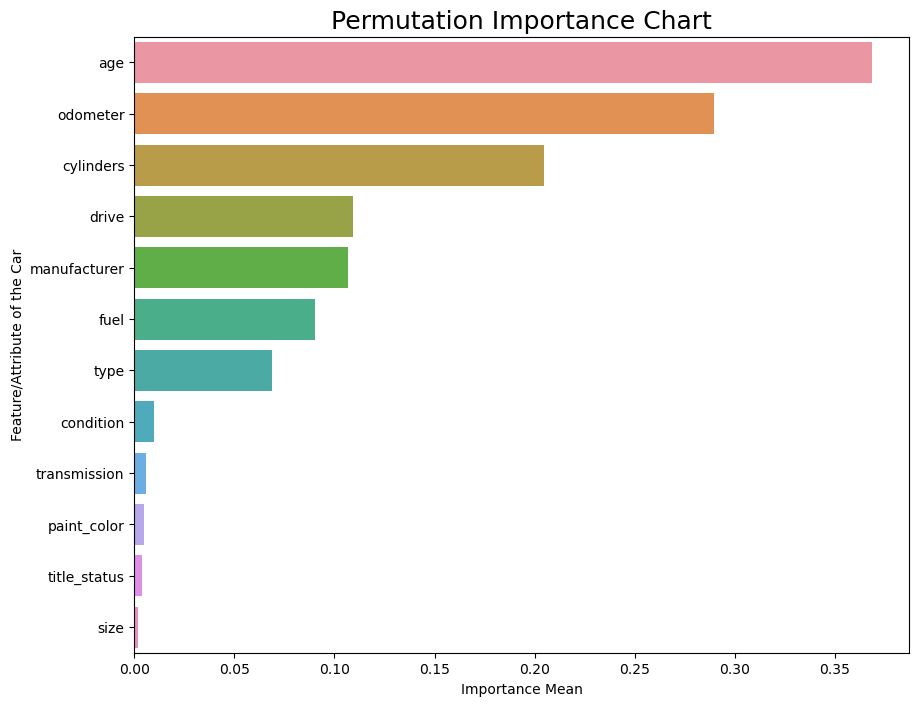

In [52]:
# Plot important features based on permutation importance
plt.figure(figsize = (10, 8))
sns.barplot(importance_df, x = 'importance_mean', y = 'feature')

plt.xlabel('Importance Mean')
plt.ylabel('Feature/Attribute of the Car')
plt.title('Permutation Importance Chart', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Plot_important_features_from_permutation_importance.png')

### Brief Summery

By selecting the best model (Random Forest Regressor) and utilizing Permutation Importance to investigate the importance of different features, based on the coefficient of each features from high to low, my analysis concluded that:

1. Age (difference conversion from Year of the car) and Odometer (of the car) are the top 2 features that have the most impact to the used car prices. This results make sense because in general, car with younger age contains less odometer number (less driven time), which make people assume that the car has relatively better condition. 
2. On the other hand, features like size (of the car), paint color (of the car), and title status (of the car) show the least important when coms to predict the price of a used car.

At this stage, according to CRISP-DM Framework, we would suggest revisit the Business Understanding stage and communicate with domain users from the business to double check if our finding is also make sense to them in their perspectives. If our finding received positive feedbacks, then the final report with conclusion will be drafted and presented to the business owners (our clients, used car dealerships).

### Actual values vs Predicted values comparison

Here is a quick comparison with Actuall values vs Predicted value in scatter plot between top two models: Random Forest Regressor vs Lasso Regression.

For Lasso regression, even though it out performed Linear regression and Ridge regression model, but it seems to overfit the data to archive better result (in term of score).

On the other hand, Random Forest Regressor in general, does not pruned the individual decision trees, instead, relying on the ensemble of trees to control overfitting, plus other strategy like reducing the number of tree to help reduce overfitting, which looks more powerful in this case.

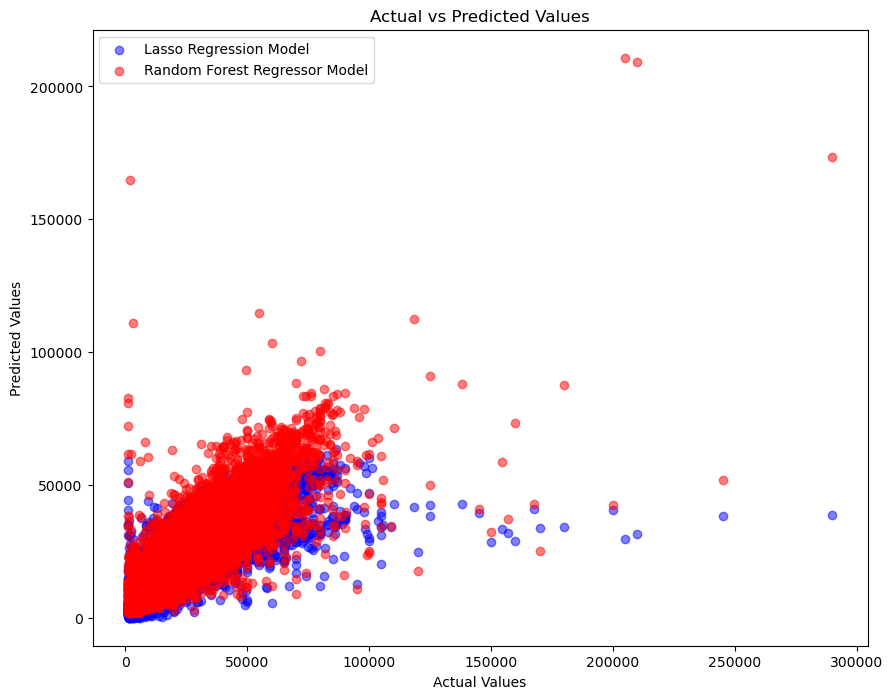

In [53]:
# Create plot to comparing between Actuall values and Predicted values, under Linear Regression Model and Random Forest Regressor Model
plt.figure(figsize = (10, 8))

# Linear Regression model predictions
y_pred_lasso = best_model_lr.predict(X_test)
plt.scatter(y_test, y_pred_lasso, alpha = 0.5, color = 'Blue', label = 'Lasso Regression Model')

# Random Forest Regressor model predictions
y_pred_rfr = best_model_rfr.predict(X_test)
plt.scatter(y_test, y_pred_rfr, alpha = 0.5, color = 'Red', label = 'Random Forest Regressor Model')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Save a copy of plot image
plt.savefig('images/Actual_Predicted_Values_Lasso_RandomForest.png')

### Feature Importance vs. Target object (Price)

Here are two scatter plots of:
1. Age (difference conversion from Year of the car) of the Car vs. Pirce of the Car with Predictions
2. Odometer of the Car Built vs. Pirce of the Car with Predictions

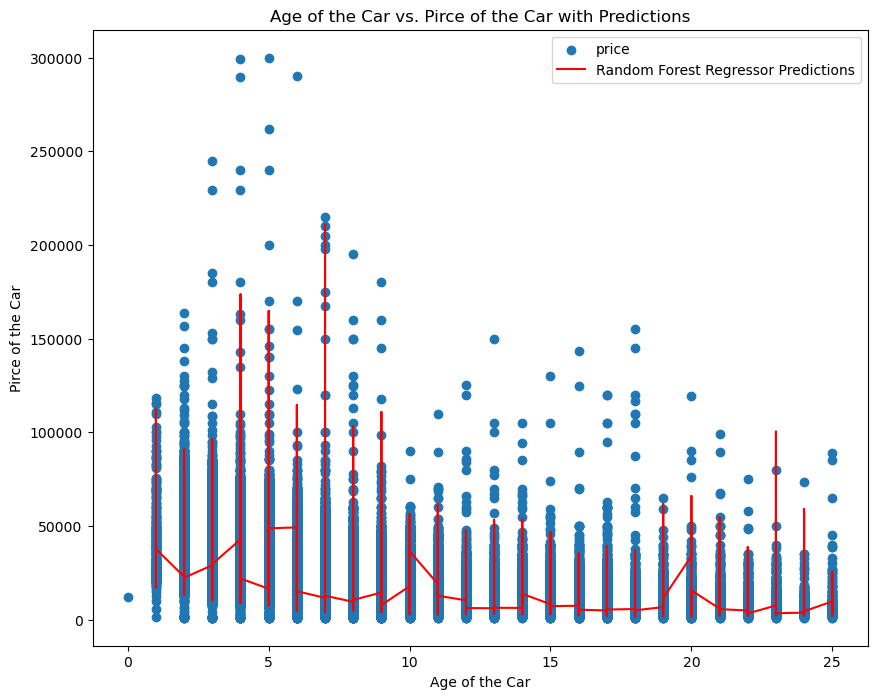

In [54]:
# Create plot to comparing Feature Importance based on Permutation Importance prediction 
plt.figure(figsize = (10, 8))

# Plot the actual data
plt.scatter(data = df_cleaned, x = 'age', y = 'price', alpha = 1)

# Random Forest Regressor model predictions on sorted data
X_test_sorted = X_test.sort_values('age')
plt.plot(X_test_sorted['age'], best_model_rfr.predict(X_test_sorted), color = 'Red', label = 'Random Forest Regressor Predictions')

plt.xlabel('Age of the Car')
plt.ylabel('Pirce of the Car')
plt.title('Age of the Car vs. Pirce of the Car with Predictions')
plt.legend()

# Save a copy of plot image
plt.savefig('images/Age_Pirce_with_Predictions.png')

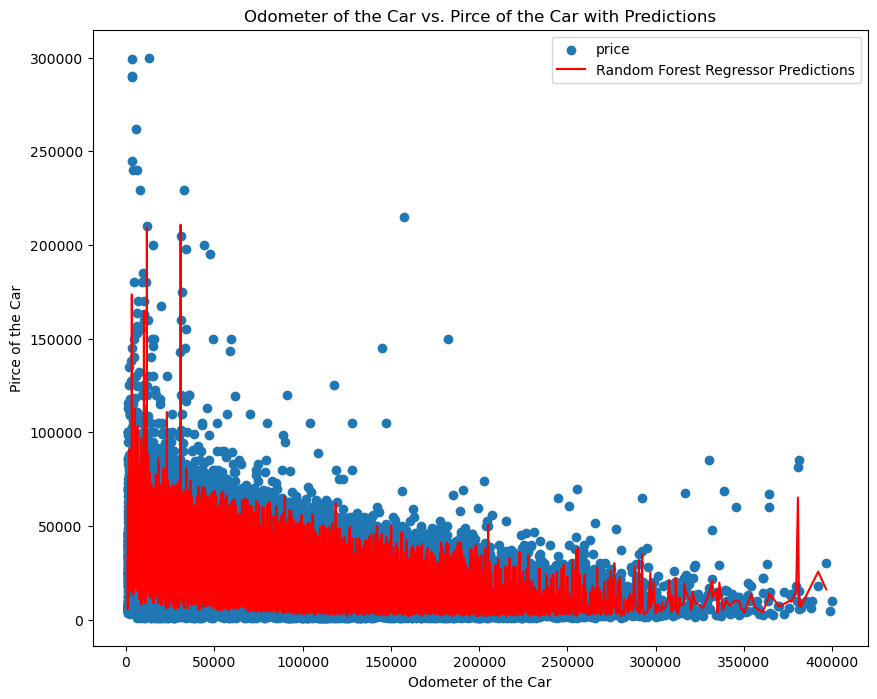

In [55]:
# Create plot to comparing Feature Importance based on Permutation Importance prediction 
plt.figure(figsize = (10, 8))

# Plot the actual data
plt.scatter(data = df_cleaned, x = 'odometer', y = 'price', alpha = 1)

# Random Forest Regressor model predictions on sorted data
X_test_sorted = X_test.sort_values('odometer')
plt.plot(X_test_sorted['odometer'], best_model_rfr.predict(X_test_sorted), color = 'Red', label = 'Random Forest Regressor Predictions')

plt.xlabel('Odometer of the Car')
plt.ylabel('Pirce of the Car')
plt.title('Odometer of the Car vs. Pirce of the Car with Predictions')
plt.legend()

# Save a copy of plot image
plt.savefig('images/Odometer_Pirce_with_Predictions.png')

### Conclusion

As our primary goal is to identify the key drivers for used cars' prices, understand the relationship between each features to the target object, price, and their weight of influence to the target object, price, become an extreme crucial task. 

In order to do make a useful predictive model which can help to estimate the uses cars's prices, we cleaned the dataset, create and run multiple regression models with the same preprocessed dataset, train and cross-validate all models by tuning up their Polynomial degree and Hyper-parameters in order to achieve their best performances, and then evaluating them along with one additional model, Random Forest Regressor, which is built as an actual machine learning algorithm.

Final decision to choose Random Forest Regressor as the best model, because it achieved the best scores in our evaluation system, despite its longest time consuming. Along with Permutation Importance feature, we concludes primary features, like Age (difference conversion from Year of the car) and Odometer (of the car) are the most important features, whereas other features like size (of the car), paint color (of the car), and title status (of the car) show the least important when coms to predict the price of a used car.

At last, for future model improvement, do keep in mind that due to the large missing value and duplicate data in the dataset, multiple actions, like dropping data and filling data (based on certain inference correlated relation) was required to be complete in order to make the data to be useful for our model training. In addition, features like model, state may also has significant influences to the price of a used cars' prices, but they were dropped due to their ambiguous data value. That being said, in order to improve our model, more data preparation process is required. With more precise data, we can re-introduce the dropping features and re-train our model, which will lead to produce a better model with more accurate prediction results.  

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Please clock Here (link) for Final Report.